In [1]:
from tensorflow.keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Input, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.layers import Conv2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import pickle
import tensorflow as tf

In [2]:
def loadPickleData(file):
    data = pickle.load(open(file, 'rb'));
    images = data[0];
    labels = data[1];
    return [images, labels]

In [3]:
[images,labels] = loadPickleData("./../Data/pickledFiles/Num_NewData_1char_3channel.p")

In [4]:
y = np_utils.to_categorical(labels);
print(y);
print(y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(5000, 10)


In [5]:
X = images
X.shape
# X = np.reshape(X, (2000,60,40,1))

(5000, 60, 40, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2);

In [7]:
model = applications.VGG19(weights = "imagenet", include_top=False,\
                           input_shape = (60, 40, 3))

In [8]:
print(len(model.layers))
for layer in model.layers[0:19]:
    layer.trainable = False

22


In [9]:
inputt = Input(shape =  (60,40,3), name = 'captcha_input')
output_vgg16_conv = model(inputt);

In [10]:
x = Flatten(name='flatten')(output_vgg16_conv)


In [11]:
predictions = Dense(10, activation="softmax")(x)


In [12]:
model_final = Model(inputt,predictions)


In [13]:
model_final.compile(loss = "categorical_crossentropy",\
                    optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

In [14]:
print(model_final.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
captcha_input (InputLayer)   [(None, 60, 40, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 20,029,514
Trainable params: 4,724,746
Non-trainable params: 15,304,768
_________________________________________________________________
None


In [15]:
lossCheck = ModelCheckpoint('singleCharLossNewData1.h5', monitor='val_loss', verbose=True, save_best_only=True)
accCheck = ModelCheckpoint('singleCharAccNewData1.h5', monitor='val_accuracy', verbose=True, save_best_only=True)

In [16]:
history = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=300, epochs=150, verbose=1, callbacks=[lossCheck, accCheck])


Epoch 1/150
14/14 [==============================] - 37s 3s/step - loss: 7.1336 - accuracy: 0.1353 - val_loss: 2.3634 - val_accuracy: 0.1360

Epoch 00001: val_loss improved from inf to 2.36339, saving model to singleCharLossNewData1.h5

Epoch 00001: val_accuracy improved from -inf to 0.13600, saving model to singleCharAccNewData1.h5
Epoch 2/150
14/14 [==============================] - 35s 2s/step - loss: 2.2769 - accuracy: 0.1145 - val_loss: 2.2532 - val_accuracy: 0.1390

Epoch 00002: val_loss improved from 2.36339 to 2.25320, saving model to singleCharLossNewData1.h5

Epoch 00002: val_accuracy improved from 0.13600 to 0.13900, saving model to singleCharAccNewData1.h5
Epoch 3/150
14/14 [==============================] - 35s 3s/step - loss: 2.2045 - accuracy: 0.1573 - val_loss: 2.1897 - val_accuracy: 0.2090

Epoch 00003: val_loss improved from 2.25320 to 2.18974, saving model to singleCharLossNewData1.h5

Epoch 00003: val_accuracy improved from 0.13900 to 0.20900, saving model to single


Epoch 00025: val_loss improved from 1.03672 to 1.02310, saving model to singleCharLossNewData1.h5

Epoch 00025: val_accuracy improved from 0.65300 to 0.65700, saving model to singleCharAccNewData1.h5
Epoch 26/150
14/14 [==============================] - 36s 3s/step - loss: 0.8980 - accuracy: 0.6777 - val_loss: 1.0291 - val_accuracy: 0.6590

Epoch 00026: val_loss did not improve from 1.02310

Epoch 00026: val_accuracy improved from 0.65700 to 0.65900, saving model to singleCharAccNewData1.h5
Epoch 27/150
14/14 [==============================] - 36s 3s/step - loss: 0.8923 - accuracy: 0.6800 - val_loss: 0.9916 - val_accuracy: 0.6610

Epoch 00027: val_loss improved from 1.02310 to 0.99165, saving model to singleCharLossNewData1.h5

Epoch 00027: val_accuracy improved from 0.65900 to 0.66100, saving model to singleCharAccNewData1.h5
Epoch 28/150
14/14 [==============================] - 38s 3s/step - loss: 0.8513 - accuracy: 0.6935 - val_loss: 1.0158 - val_accuracy: 0.6600

Epoch 00028: val_

14/14 [==============================] - 37s 3s/step - loss: 0.2967 - accuracy: 0.9032 - val_loss: 0.8008 - val_accuracy: 0.7480

Epoch 00084: val_loss did not improve from 0.76964

Epoch 00084: val_accuracy did not improve from 0.75500
Epoch 85/150
14/14 [==============================] - 37s 3s/step - loss: 0.2688 - accuracy: 0.9185 - val_loss: 0.7940 - val_accuracy: 0.7550

Epoch 00085: val_loss did not improve from 0.76964

Epoch 00085: val_accuracy did not improve from 0.75500
Epoch 86/150
14/14 [==============================] - 37s 3s/step - loss: 0.2609 - accuracy: 0.9247 - val_loss: 0.7808 - val_accuracy: 0.7580

Epoch 00086: val_loss did not improve from 0.76964

Epoch 00086: val_accuracy improved from 0.75500 to 0.75800, saving model to singleCharAccNewData1.h5
Epoch 87/150
14/14 [==============================] - 36s 3s/step - loss: 0.2561 - accuracy: 0.9295 - val_loss: 0.8062 - val_accuracy: 0.7590

Epoch 00087: val_loss did not improve from 0.76964

Epoch 00087: val_accur


Epoch 00115: val_loss did not improve from 0.76964

Epoch 00115: val_accuracy did not improve from 0.77200
Epoch 116/150
14/14 [==============================] - 20s 1s/step - loss: 0.1520 - accuracy: 0.9655 - val_loss: 0.8338 - val_accuracy: 0.7640

Epoch 00116: val_loss did not improve from 0.76964

Epoch 00116: val_accuracy did not improve from 0.77200
Epoch 117/150
14/14 [==============================] - 20s 1s/step - loss: 0.1486 - accuracy: 0.9682 - val_loss: 0.8440 - val_accuracy: 0.7670

Epoch 00117: val_loss did not improve from 0.76964

Epoch 00117: val_accuracy did not improve from 0.77200
Epoch 118/150
14/14 [==============================] - 20s 1s/step - loss: 0.1472 - accuracy: 0.9690 - val_loss: 0.8336 - val_accuracy: 0.7670

Epoch 00118: val_loss did not improve from 0.76964

Epoch 00118: val_accuracy did not improve from 0.77200
Epoch 119/150
14/14 [==============================] - 20s 1s/step - loss: 0.1431 - accuracy: 0.9712 - val_loss: 0.8477 - val_accuracy: 0.7

14/14 [==============================] - 20s 1s/step - loss: 0.0859 - accuracy: 0.9868 - val_loss: 0.9021 - val_accuracy: 0.7730

Epoch 00148: val_loss did not improve from 0.76964

Epoch 00148: val_accuracy did not improve from 0.77500
Epoch 149/150
14/14 [==============================] - 20s 1s/step - loss: 0.0882 - accuracy: 0.9860 - val_loss: 0.8873 - val_accuracy: 0.7710

Epoch 00149: val_loss did not improve from 0.76964

Epoch 00149: val_accuracy did not improve from 0.77500
Epoch 150/150
14/14 [==============================] - 20s 1s/step - loss: 0.0846 - accuracy: 0.9875 - val_loss: 0.8963 - val_accuracy: 0.7740

Epoch 00150: val_loss did not improve from 0.76964

Epoch 00150: val_accuracy did not improve from 0.77500


In [17]:
import matplotlib.pyplot as plt

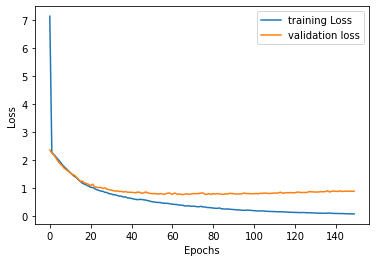

In [18]:
plt.plot(history.history['loss'], label = "training Loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

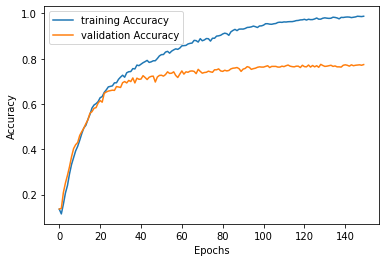

In [19]:
plt.plot(history.history['accuracy'], label = "training Accuracy")
plt.plot(history.history['val_accuracy'], label = "validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
history1 = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=300, epochs=50, verbose=1);

In [57]:
history2 = model_final.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=300, epochs=50, verbose=1);

Epoch 1/50
6/6 [==============================] - 8s 1s/step - loss: 0.7408 - accuracy: 0.7550 - val_loss: 1.7918 - val_accuracy: 0.4675
Epoch 2/50
6/6 [==============================] - 8s 1s/step - loss: 0.7422 - accuracy: 0.7575 - val_loss: 1.8043 - val_accuracy: 0.4625
Epoch 3/50
6/6 [==============================] - 8s 1s/step - loss: 0.7343 - accuracy: 0.7569 - val_loss: 1.8027 - val_accuracy: 0.4650
Epoch 4/50
6/6 [==============================] - 8s 1s/step - loss: 0.7151 - accuracy: 0.7619 - val_loss: 1.7949 - val_accuracy: 0.4775
Epoch 5/50
6/6 [==============================] - 8s 1s/step - loss: 0.7033 - accuracy: 0.7713 - val_loss: 1.8078 - val_accuracy: 0.4525
Epoch 6/50
6/6 [==============================] - 8s 1s/step - loss: 0.6999 - accuracy: 0.7706 - val_loss: 1.7969 - val_accuracy: 0.4775
Epoch 7/50
6/6 [==============================] - 8s 1s/step - loss: 0.6904 - accuracy: 0.7756 - val_loss: 1.8212 - val_accuracy: 0.4575
Epoch 8/50
6/6 [=========================

In [61]:
max(max(history.history["val_accuracy"]), max(history1.history["val_accuracy"]), max(history2.history["val_accuracy"]))

0.47999998927116394

In [63]:
xtr = model_final.predict(X_train, batch_size = 200, verbose=1)

8/8 [==============================] - 5s 569ms/step


In [64]:
Xtest = model_final.predict(X_test, batch_size = 100, verbose=1);

4/4 [==============================] - 1s 294ms/step


In [65]:
print(xtr.shape)

(1600, 10)


In [66]:
resize = np.prod(xtr.shape[1:])

In [67]:
xtr = np.reshape(xtr, (1600, resize));
Xtest = np.reshape(Xtest, (400, resize));

In [74]:
bf_train_s = xtr
bf_test_s = Xtest

In [75]:
y_train_mc = np.argmax(y_train, axis=1)
y_test_mc = np.argmax(y_test, axis = 1)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm


In [77]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', verbose=1,max_iter=10000)

In [78]:
clf.fit(bf_train_s,y_train_mc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=10000, multi_class='multinomial', verbose=1)

In [79]:
print(clf.score(bf_test_s, y_test_mc))

0.4675


In [81]:
multiClassSVM = svm.LinearSVC(loss = 'squared_hinge', penalty = 'l2',C=1/5000 ,max_iter=800000,verbose=1) 
multiClassSVM.fit(bf_train_s,y_train_mc)

[LibLinear]

LinearSVC(C=0.0002, max_iter=800000, verbose=1)

In [82]:
multiClassSVM.score(bf_test_s, y_test_mc)

0.465